In [2]:
import numpy as np
import pickle
#import pickle5 as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from read_data import *

x_train, y_train, censoring_train,x_val, y_val, x_test, y_test, _, x_tau, tau = get_dataset("synth", plotting=True)
x_train = x_train[:250]
y_train = y_train[:250]
censoring_train = censoring_train[:250]

/zhome/59/c/105408/Cens_AL/censored_AL/AL/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(9000, 1)
(9000,)
(9000,)
(1000, 1)
(1000,)
Censoring: 0.5101111111111111
Train: (9000, 1)
y-Train: (9000,)
Val: (250, 1)
y-Val: (250,)
Test: (500, 1)
y-test: (500,)


In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

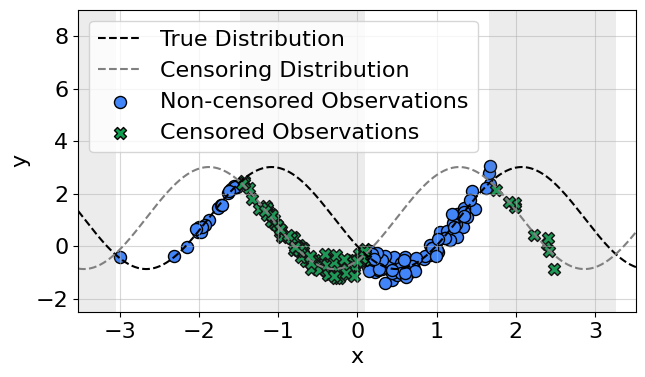

In [4]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 236.84843*2
fig, ax = plt.subplots(1, 1, figsize=set_size(width), frameon=False)
#ig, ax = plt.subplots(frameon=False)
plt.scatter(x_train[censoring_train == 0], y_train[censoring_train == 0],s=75, color='#4285F9', edgecolors='black', marker = 'o', label='Non-censored Observations') 
plt.scatter(x_train[censoring_train == 1], y_train[censoring_train == 1],s=75, color='#0F9D50', edgecolors='black', marker = 'X', label='Censored Observations')
plt.plot(x_test, y_test, color='black', linestyle='dashed', label='True Distribution')
plt.plot(x_tau, tau, color='gray', linestyle='dashed', label='Censoring Distribution')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim(None, 9.0)
#plot legend onto the plot
plt.legend(loc='upper left', fontsize=16)
plt.grid(True, alpha=0.5)
plt.tight_layout()
ax.axvspan(-5, -3.04519382, facecolor='gray', alpha=0.15)
ax.axvspan( -1.47879906, 0.10170736, facecolor='gray', alpha=0.15)
ax.axvspan( 1.66810212, 3.2627202, facecolor='gray', alpha=0.15)
plt.xlim(x_test.min(), x_test.max())
plt.ylim(-2.5, 9.0)
#plt.axhspan(x_test, ymax=100)
plt.savefig("1d_example.pdf")

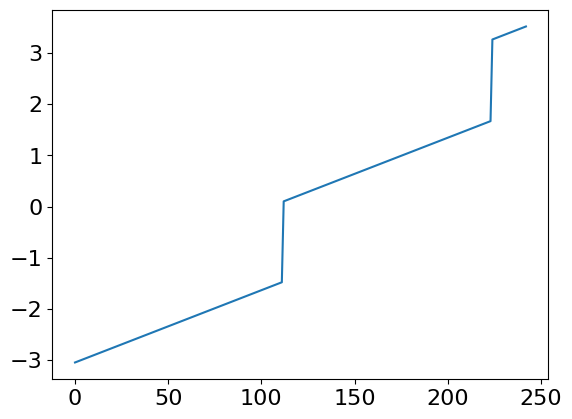

In [5]:
plt.plot(x_test[np.where(tau > y_test)[0]])

In [22]:
x_test[np.where(tau > y_test)[0]][220:250]

array([[1.62576712],
       [1.63987879],
       [1.65399045],
       [1.66810212],
       [3.2627202 ],
       [3.27683187],
       [3.29094353],
       [3.3050552 ],
       [3.31916686],
       [3.33327853],
       [3.34739019],
       [3.36150186],
       [3.37561352],
       [3.38972518],
       [3.40383685],
       [3.41794851],
       [3.43206018],
       [3.44617184],
       [3.46028351],
       [3.47439517],
       [3.48850684],
       [3.5026185 ],
       [3.51673017]])

In [6]:
datasets['test']

{'e': array([1, 0, 0, ..., 1, 1, 0], dtype=int32),
 't': array([1.0986123, 6.4019175, 7.282761 , ..., 1.7917595, 2.3025851,
        6.7787848], dtype=float32),
 'x': array([[ 56.05698   ,   1.        ,   4.        , ..., 153.        ,
          15.798828  ,   2.        ],
        [ 39.84097   ,   0.        ,   3.        , ..., 132.        ,
          20.796875  ,   1.1999512 ],
        [ 25.00999   ,   0.        ,   0.        , ..., 137.        ,
          12.298828  ,   1.1999512 ],
        ...,
        [ 63.228     ,   0.        ,   1.        , ..., 132.        ,
           7.7998047 ,   1.5       ],
        [ 75.40594   ,   0.        ,   2.        , ..., 140.        ,
          15.3984375 ,   0.89990234],
        [ 39.53497   ,   1.        ,   3.        , ..., 135.        ,
          20.398438  ,   1.2998047 ]], dtype=float32)}